## Random Forests - Classification and Regression
* Random forests is a supervised learning algorithm. 
* It can be used both for classification and regression problems.
* Random forests fits a number of decision tree classifiers on randomly selected sub-samples of the dataset.
* It obtains a prediction from each tree, then uses voting to return an optimal result
* It uses averaging to improve the predictive accuracy and minimise over-fitting.
* Increasing the number of trees improves robustness
* Random forests uses randomly selected subsets of the training data to create decorrelated decision trees. This reduces variances, and improves robustness of the model, by ensuring the model isn't entirely dependent on any given strong predictor. 
* Random forests is good for applications such as recommendation engines, image classification, predict patient outcomes based on symptoms, etc.
* If you were seeking recommendations to buy a product online, e.g. an air fryer, you would search and read online reviews. This can be compared to the decison tree part of the algorithm.
* You would then tally the votes for the most recommended products and base your decision on the majority vote. 

In [102]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def check_NaN(dataframe):
    print("Total NaN:", dataframe.isnull().values.sum())
    print("NaN by column:\n",dataframe.isnull().sum())
    return

def fillNaN_other(dataframe, key):
    dataframe[key].fillna('Other', inplace = True)
    return 

### Classification Problem: Predict Whether a Credit Card Transaction is Fraudulent
Let's predict whether or not a transaction is fraudulent. The dataset used in this exercise can be found here: https://www.kaggle.com/mlg-ulb/creditcardfraud

In [109]:
data = pd.read_csv("./datasets/creditcard.csv")

In [110]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [101]:
check_NaN(data)

Total NaN: 0
NaN by column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


#### Feature Selection
Because this is a real life dataset, the features used to predict whether a transaction is or is not fraudulent have been relabelled to protect the privacy of users. For more information on features, visit this website: https://www.kaggle.com/mlg-ulb/creditcardfraud

In [105]:
data.features = data[["Amount","V28","V27","V26"]]
data.target = data.Class

C:\Users\Andreas Shepley\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
C:\Users\Andreas Shepley\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [106]:
x_train, x_test, y_train, y_test = train_test_split(data.features,data.target, test_size=0.2)

Go to https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html for more information on the parameters you can pass into your random forest classifier. The two most important parameters are n_estimators and max_features.
* n_estimators is the number of trees in the forest. The default is 100 (int). Increasing the number of trees improves accuracy by improving the model's ability to generalise.
* max_features is the maximum number of features to consider when looking for the best split. Possible values include:{“auto”, “sqrt”, “log2”}, int or float, default=”auto”. "auto" is the same as "sqrt". "sqrt" means the maximum number of features will be equal to the square root of the number of features in the training set. If max_features== numbber of features in the dataset, you will end up with a bagged decision tree model, not a random forest. If max_features< number of features you will create a random forest. 

In [107]:
model = RandomForestClassifier(n_estimators=100, max_features='sqrt')
fitted_model = model.fit(x_train, y_train)
predictions = fitted_model.predict(x_test)

In [128]:
print(confusion_matrix(y_test, predictions))

[[56858     2]
 [   82    20]]


In [129]:
print("Accuracy: {:0.2f}%".format(accuracy_score(y_test, predictions)*100))

Accuracy: 99.85%


### Visualisation of the importance of variables in classifying a transaction as fraudulent or not

No handles with labels found to put in legend.


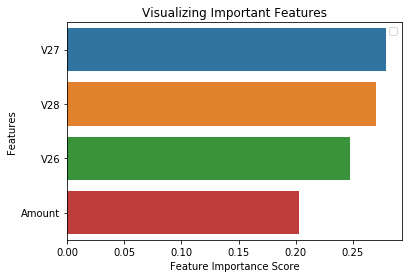

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

feature_imp = pd.Series(model.feature_importances_,index=x_train.columns).sort_values(ascending=False)

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Advantages of using Random Forests
* It decorrelates features, even if the dataset has many highly correlated features, thus removing bias in the prediction.
* It can reduce error because it relies on a collection of decision trees, which means that it will use many trees to predict the outcome of one sample, minimising error and variance.
* It performs well on unbalanced datasets, e.g. when one class is is dominant, e.g >98% of transactions will be genuine, with <2% fraudulent
* Minimisation of impact of outliers on predictions because many trees are used
* Very good at generalisation, with minmal overfitting because only a random subset of features are used per tree, with many trees being used per prediction.

### Exercise: 
Try different combinations of trainig features to see if you can improve the accuracy of the model. Which features are the most important?